## Understanding the image pro-processor 

[OfficialDoc](https://huggingface.co/docs/transformers/en/preprocessing)

In [ ]:
# !pip install datasets 

In [4]:
from datasets import load_dataset
from transformers import AutoImageProcessor
from torchvision.transforms import RandomResizedCrop, ColorJitter, Compose

In [1]:


cache_dir = "/mounted_data/downloaded"
dataset = load_dataset("food101", split="train[:100]", cache_dir="./data")

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

train-00000-of-00008.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

train-00001-of-00008.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

train-00002-of-00008.parquet:   0%|          | 0.00/472M [00:00<?, ?B/s]

train-00003-of-00008.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

train-00004-of-00008.parquet:   0%|          | 0.00/475M [00:00<?, ?B/s]

train-00005-of-00008.parquet:   0%|          | 0.00/470M [00:00<?, ?B/s]

train-00006-of-00008.parquet:   0%|          | 0.00/478M [00:00<?, ?B/s]

train-00007-of-00008.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

validation-00000-of-00003.parquet:   0%|          | 0.00/423M [00:00<?, ?B/s]

validation-00001-of-00003.parquet:   0%|          | 0.00/413M [00:00<?, ?B/s]

validation-00002-of-00003.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/75750 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/25250 [00:00<?, ? examples/s]

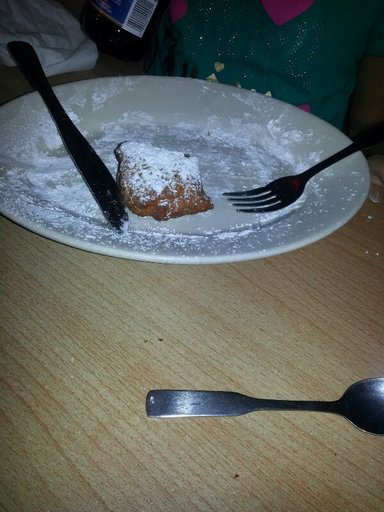

In [6]:
dataset[0]["image"]

In [9]:
print(dataset[0].keys())
print(dataset[0]['label'])

dict_keys(['image', 'label'])
6


In [2]:

cache_dir = "/mounted_data/downloaded/pretrained"
image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224", cache_dir=cache_dir)
print(image_processor)

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}



In [5]:
size = (
    image_processor.size["shortest_edge"]
    if "shortest_edge" in image_processor.size
    else (image_processor.size["height"], image_processor.size["width"])
)

_transforms = Compose([RandomResizedCrop(size), ColorJitter(brightness=0.5, hue=0.5)])

The model accepts `pixel_values` as its input. `ImageProcessor` can take care of normalizing the images, and generating appropriate tensors. Create a function that combines image augmentation and image preprocessing for a batch of images and generates pixel_values:

In [10]:
def transforms(examples):
    images = [_transforms(img.convert("RGB")) for img in examples["image"]]
    examples["pixel_values"] = image_processor(images, do_resize=False, return_tensors="pt")["pixel_values"]
    return examples

In the example above we set `do_resize=False` because we have already resized the images in the image augmentation transformation, and leveraged the size attribute from the appropriate image_processor. If you do not resize images during image augmentation, leave this parameter out. By default, ImageProcessor will handle the resizing.

In [12]:
dataset.set_transform(transforms)
print(dataset[0].keys())

dict_keys(['image', 'label', 'pixel_values'])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.60784316].


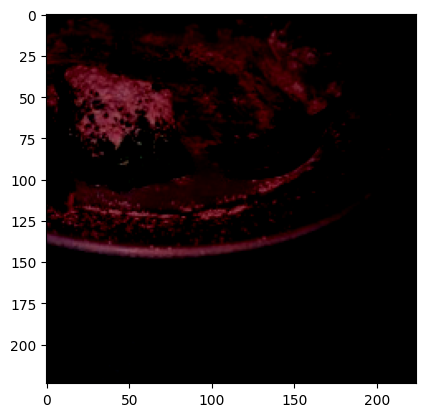

In [13]:
import numpy as np
import matplotlib.pyplot as plt

img = dataset[0]["pixel_values"]
plt.imshow(img.permute(1, 2, 0))